# Preparing Data

In [66]:
import pandas as pd 
import numpy as np
tweet = pd.read_excel("tweet.xlsx")

tweet.head()

,Text
0,Sirkuit Mandalika menjadi pavorit para pembala...
1,Sirkuit Mandalika mendapat pujian pembalap kel...
2,Sirkuit Mandalika menjadi favorit pembalap kel...
3,"Ajang balap motor kelas dunia, MotoGP, telah s..."
4,Sirkuit Mandalika Mendapat Pujian Pembalap Kel...


# Case Folding

In [67]:
# ------ Case Folding --------
# Using Series.str.lower() function on Pandas
tweet['Text Case Folding'] = tweet['Text'].str.lower()


print('Case Folding Result : \n')
print(tweet['Text Case Folding'].head(5))
print('\n\n\n')

Case Folding Result : 

0    sirkuit mandalika menjadi pavorit para pembala...
1    sirkuit mandalika mendapat pujian pembalap kel...
2    sirkuit mandalika menjadi favorit pembalap kel...
3    ajang balap motor kelas dunia, motogp, telah s...
4    sirkuit mandalika mendapat pujian pembalap kel...
Name: Text Case Folding, dtype: object






# Tokenizing

In [68]:
import string 
import re #regex library

# import word_tokenize
from nltk.tokenize import word_tokenize 

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

tweet['Text Case Folding'] = tweet['Text Case Folding'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

tweet['Text Tokenizing'] = tweet['Text Case Folding'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(tweet['Text Tokenizing'].head())
print('\n\n\n')

Tokenizing Result : 

0    [sirkuit, mandalika, menjadi, pavorit, para, p...
1    [sirkuit, mandalika, mendapat, pujian, pembala...
2    [sirkuit, mandalika, menjadi, favorit, pembala...
3    [ajang, balap, motor, kelas, dunia, motogp, te...
4    [sirkuit, mandalika, mendapat, pujian, pembala...
Name: Text Tokenizing, dtype: object






# Normalization

In [69]:
normalizad_word = pd.read_excel("kamuskatabaku.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

tweet['Text Normalization'] = tweet['Text Tokenizing'].apply(normalized_term)

tweet['Text Normalization'].head()

0    [sirkuit, mandalika, menjadi, favorit, para, p...
1    [sirkuit, mandalika, mendapat, pujian, pembala...
2    [sirkuit, mandalika, menjadi, favorit, pembala...
3    [ajang, balap, motor, kelas, dunia, motogp, te...
4    [sirkuit, mandalika, mendapat, pujian, pembala...
Name: Text Normalization, dtype: object

# Stemming

In [70]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweet['Text Normalization']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet['Text Stemming'] = tweet['Text Normalization'].swifter.apply(get_stemmed_term)
print(tweet['Text Stemming'])

27481
------------------------
sirkuit : sirkuit
mandalika : mandalika
menjadi : jadi
favorit : favorit
para : para
pembalap : balap
kelas : kelas
dunia : dunia
bersatuwujudkannkrimaju : bersatuwujudkannkrimaju
mendapat : dapat
pujian : puji
ajang : ajang
balap : balap
motor : motor
motogp : motogp
telah : telah
sukses : sukses
digelar : gelar
di : di
setelah : telah
ini : ini
event : event
besar : besar
apa : apa
yang : yang
akan : akan
diselenggarakan : selenggara
ikuti : ikut
pembahasannya : bahas
sapaindonesia : sapaindonesia
akhir : akhir
pekan : pekan
sesaat : saat
lag : lag
streamin : streamin
senasib : nasib
marquez : marquez
video : video
kecelakaan : celaka
mick : mick
schumacher : schumacher
jeddah : jeddah
pada : pada
sesilatihan : sesilatihan
beda : beda
dengan : dengan
formula : formula
gelaran : gelar
tau : tau
sudah : sudah
jadi : jadi
megahnya : megah
sdgkan : sdgkan
gaungnya : gaung
lama : lama
tapi : tapi
kelihatan : lihat
ribetam : ribetam
dicurigai : curiga
ada : a

elovecege : elovecege
akyarecehan : akyarecehan
begini : begini
bentuk : bentuk
tiap : tiap
kendaraan : kendara
enggak bisa : enggak bisa
formulae : formulae
mobil : mobil
elektrik : elektrik
butuh : butuh
tikungan : tikung
ngisi : ngisi
daya : daya
pengereman : rem
dibikin : bikin
permanen : permanen
memang : memang
sebanyak : banyak
listrik : listrik
ahiraidris : ahiraidris
minyak : minyak
goreng : goreng
suatu : suatu
mudah : mudah
pemerintah : perintah
susah : susah
soalnya : soal
tol : tol
ataupun : atau
bisamungkin : bisamungkin
mahal : mahal
rp : rp
sumbangan : sumbang
ikn : ikn
rangkas : rangkas
onvomf : onvomf
biawak : biawak
heho : heho
nabung : nabung
menonton : tonton
pawange : pawange
mindahe : mindahe
udan : udan
gur : gur
ngawur : ngawur
jingannn : jingannn
tengah : tengah
barat : barat
dijamin : jamin
bakal : bakal
kekhawatiran : khawatir
muncul : muncul
belakangan : belakang
auufa : auufa
cherazadems : cherazadems
kayanya : kaya
menunggu : tunggu
keputusan : putus
nua 

bahlulbiarkan : bahlulbiarkan
air : air
turun : turun
langit : langit
langsung : langsung
bumisunattullahkalo : bumisunattullahkalo
perlu : perlu
airnya : air
diatur : atur
sorot : sorot
pri : pri
berakhir : akhir
giliran : gilir
cek : cek
kompak : kompak
ingin : ingin
upoflevi : upoflevi
awalnya : awal
aku : aku
ic : ic
kunjungan : kunjung
beritanya : berita
landasan : landas
eek : eek
memangnya : memang
perbukitan : bukit
suka : suka
mutar : mutar
dong : dong
bijimana : bijimana
ajak : ajak
konsumen : konsumen
pt : pt
sjam : sjam
perbanyak : banyak
program : program
untukkonsumen : untukkonsumen
cerita : cerita
sisi : sisi
cost : cost
gede : gede
standar : standar
hosting : hosting
fee : fee
tahunan : tahun
diatas : atas
sementara : sementara
wsbk : wsbk
supercar : supercar
persiapan : siap
sean : sean
gelael : gelael
optimisindonesiamaju : optimisindonesiamaju
kapolri : kapolri
pengamanan : aman
kapolda : kapolda
irjen : irjen
djoko : djoko
poerwanto : poerwanto
dilibatkan : libat
d

hehe : hehe
bangga : bangga
rasanya : rasa
menyimpan : simpan
keunikan : uni
kekhasan : khas
kulinernya : kuliner
motogpbarengindihome : motogpbarengindihome
populer : populer
propert : propert
contoh : contoh
ngebandingin : ngebandingin
vs : vs
dst : dst
sholat : sholat
subuh : subuh
berasa : asa
mendengarkan : dengar
racing : racing
dibunuh : bunuh
apabannes : apabannes
hadapan : hadap
sports : sports
wejangan : wejang
rubah : rubah
minimal : minimal
track : track
lurus : lurus
naruh : naruh
spot : spot
masak : masak
gravelnya : gravel
kurangi : kurang
nger : nger
joan : joan
mir : mir
bercerita : cerita
keangkeran : angker
awal : awal
kesiapan : kesiap
fdration : fdration
lautomobile : lautomobile
mengunjungi : unjung
kamis : kamis
kuwong : wong
mengapai : kapai
australia : australia
biarpun : biarpun
jurnalis : jurnalis
mengurusi : urus
pengaspalan : aspal
milik : milik
amordr : amordr
embe : embe
setengah : tengah
orangnya : orang
keluargany : keluargany
kesampaian : sampai
tenaan

your : your
home : home
wor : wor
our : our
offic : offic
jl : jl
metro : metro
pondok : pondok
blok : blok
sg : sg
investasiproperti : investasiproperti
bisnisproperti : bisnisproperti
jualbelisewaproperti : jualbelisewaproperti
curhatan : curhatan
sampa : sampa
barang : barang
aneaneh : aneaneh
dilirik : lirik
un : un
langganan : langgan
rezimpkiislamphobia : rezimpkiislamphobia
terselenggaranya : selenggara
turnamen : turnamen
multiplier : multiplier
effect : effect
goodstats : goodstats
gnfi : gnfi
vvildrift : vvildrift
pergi : pergi
merenung : renung
mgaliboposisi : mgaliboposisi
cebongers : cebongers
menyamakan : sama
mentereng : mentereng
menatap : tatap
kejurnas : kejurnas
motorcross : motorcross
lantan : lantan
kecamatan : camat
batukliang : batukliang
utara : utara
maksudnya : maksud
multi : multi
divariasikan : variasi
kebutuhan : butuh
single : single
cota : cota
silverstone : silverstone
anca : anca
pernyataan : nyata
dikategorikan : kategori
pelecehan : leceh
agama : agam

mengguyursirkuit : mengguyursirkuit
gajah : gajah
sepak : sepak
endolganteng : endolganteng
yimasruminah : yimasruminah
ilmi : ilmi
susi : sus
pudjiastuti : pudjiastuti
semprotan : semprot
sampanye : sampanye
pikirarakyat : pikirarakyat
gaib : gaib
jatuh : jatuh
yanpermana : yanpermana
bangmarc : bangmarc
lest : lest
membawa : bawa
buruk : buruk
eksekusinya : eksekusi
dipertanyakan : tanya
alternatif : alternatif
tayang : tayang
kambuh : kambuh
absen : absen
amerika : amerika
serikat : serikat
inewstegal : inewstegal
gpmandalika : gpmandalika
absenbalapan : absenbalapan
amerikaserikat : amerikaserikat
beritaterkini : beritaterkini
adisresidb : adisresidb
counter : counter
kader : kader
years : years
progress : progress
reportnya : reportnya
resmikan : resmi
nopember : nopember
rupiah : rupiah
kapitalis : kapitalis
tertawa : tertawa
geli : geli
tingkah : tingkah
fansnya : fansnya
surabayatv : surabayatv
qatargp : qatargp
oktertifa : oktertifa
keliling : keliling
bila : bila
istana : ist

berguru : guru
sala : sala
serpihan : serpih
epublikaonline : epublikaonline
mengincar : incar
perusahaan : usaha
seberapa : berapa
mencium : cium
teruterusan : uterus
sekadar : sekadar
beradu : adu
teranyarnya : anyar
oeripsarap : oeripsarap
ndonmustanakkolong : ndonmustanakkolong
kaum : kaum
pecundang : cundang
kebencian : benci
kronis : kronis
gembira : gembira
merasakan : rasa
loh : loh
pencita : cita
mengantre : antre
kabarnga : kabarnga
pascpergerlaran : pascpergerlaran
hsce : hsce
epotnova : epotnova
sebutkan : sebut
begawan : begawan
persepsi : persepsi
dipukul : pukul
parade : parade
peserta : serta
dibalas : balas
pukulan : pukul
elegan : elegan
skor : skor
imbang : imbang
permainan : main
serunya : seru
be : be
fair : fair
baruan : baru
bunderan : bunderan
hi : hi
ditinggal : tinggal
pelaksanaan : laksana
kegigihanmu : gigih
jangka : jangka
sindonews : sindonews
bukanberitabiasa : bukanberitabiasa
serahkan : serah
trofi : trofi
berputar : putar
menderita : derita
menepi : te

reakmoon : reakmoon
iah : iah
namanyasinging : namanyasinging
lazim : lazim
meditasi : meditasi
terapi : terapi
johann : johann
zarco : zarco
membaik : baik
bengek : bengek
fyp : fyp
gunungkidul : gunungkidul
owjawi : owjawi
sido : sido
nguncalne : nguncalne
katok : katok
videonya : video
militan : militan
sepakat : sepakat
tangkal : tangkal
dihina : hina
apapa : apapa
akuratco : akuratco
kawanakuratco : kawanakuratco
akuratcovideo : akuratcovideo
mengharapkan : harap
ciptakan : cipta
sumber : sumber
mempercayai : percaya
mandor : mandor
gtworldchallenge : gtworldchallenge
berserakan : sera
pegiat : giat
superbik : superbik
teh : teh
ukangkabe : ukangkabe
cincau : cincau
seharhari : seharhari
kedepannya : depan
irzieidris : irzieidris
mt : mt
harap : harap
share : share
mtblite : mtblite
ditugaskan : tugas
adakah : ada
suzuka : suzuka
profesi : profesi
teknologinya : teknologi
narasi : narasi
daily : daily
narasidaily : narasidaily
narasinewsroom : narasinewsroom
jadipaham : jadipaham


justruasyik : justruasyik
emak : emak
pakan : pakan
prmnsahabatumkm : prmnsahabatumkm
jumlahnya : jumlah
bertanytanya : bertanytanya
didapatkan : dapat
mediaasing : mediaasing
curi : curi
suplier : suplier
menemukan : temu
komposisi : komposisi
menyontek : sontek
koneksi : koneksi
lemot : lot
dirjen : dirjen
sdppi : sdppi
kemkominfo : kemkominfo
ismail : ismail
litkawulo : litkawulo
ennsauya : ennsauya
izmay : izmay
musyri : musyri
finis : finis
posisi : posisi
uangkode : uangkode
hebatnyabuang : hebatnyabuang
tempatny : tempatny
mention : mention
mindset : mindset
joro : joro
kehidupan : hidup
aplg : aplg
janda : janda
ceria : ceria
respec : respec
membersihkan : bersih
evaluasi : evaluasi
manajemen : manajemen
pemetaan : meta
system : system
prasarana : prasarana
geram : geram
ustaz : ustaz
khalid : khalid
basalama : basalama
haram : haram
jajaran : jajar
bmw : bmw
berseliweran : seliwer
dipuja : puja
bak : bak
dewa : dewa
memutuskan : putus
auto : auto
penyiyir : penyiyir
terlaksana

ulshious : ulshious
gapapa : gapapa
itung : itung
pertengkaran : tengkar
dont : dont
worry : worry
about : about
now : now
coz : coz
ku : ku
mengenalkan : kenal
seribu : ribu
meluncurkanaplikasi : meluncurkanaplikasi
pulo : pulo
experience : experience
expo : expo
sumbe : sumbe
dithea : dithea
hrismi : hrismi
hara : hara
erunipuspaalam : erunipuspaalam
ngamu : ngamu
samasekali : samasekali
berkumandang : kumandang
eric : eric
bicarain : bicarain
dikucurkan : kucur
rinciannya : rinciannya
remaja : remaja
perkataan : kata
reporter : reporter
ralat : ralat
banggaan : bangga
bosss : bosss
disambangi : sambang
skatmat : skatmat
busuk : busuk
dijauhi : jauh
tekno : tekno
beasiswasingapura : beasiswasingapura
manfaatkan : manfaat
nfinitzer : nfinitzer
eguh : eguh
ardinahrowi : ardinahrowi
bertahutahun : bertahutahun
faktofaktor : faktofaktor
singapura : singapura
hobyku : hobyku
gontganti : gontganti
vga : vga
present : present
skill : skill
fikir : fikir
taman : taman
terungka : ungka
memodi

adv : adv
rridersacademy : rridersacademy
ndreadovizioso : ndreadovizioso
orysava : orysava
yeah : yeah
hemandalikag : hemandalikag
admin : admin
jagoan : jago
keberapa : berapa
diagendakan : agenda
timbulkan : timbul
gerombolan : gerombol
dungu : dungu
koar : koar
karuan : karuan
sensasi : sensasi
camping : camping
tandingannya : tanding
heba : heba
tandingan : tanding
bunting : bunting
hinaan : hina
apapu : apapu
uhar : uhar
ertamina : ertamina
kontraktor : kontraktor
mengerjakan : kerja
perumpp : perumpp
gimmick : gimmick
pembicaraan : bicara
dipenjuru : penjuru
penikmat : nikmat
diekspose : ekspose
cowok : cowok
sentil : sentil
mandalikan : mandalikan
fadli : fadli
zo : zo
berlangsungnya : langsung
membelikan : beli
ice : ice
aufalfikrians : aufalfikrians
anung : anung
srbelim : srbelim
darius : darius
sinathrya : sinathrya
unggah : unggah
rampung : rampung
dimodifikasi : modifikasi
utasan : utas
vello : vello
jejaring : jejaring
evello : evello
bigdata : bigdata
kawanpajak : kawan

tukeran : tukeran
gurunbiar : gurunbiar
kering : kering
ogahmusyrik : ogahmusyrik
bangkitkan : bangkit
harian : hari
terbaru : baru
palu : palu
aktual : aktual
petirmenyambarlintasansirkuitmandalika : petirmenyambarlintasansirkuitmandalika
qatar : qatar
siapin : siapin
ante : ante
nyewa : nyewa
anter : anter
pulangnya : pulang
circuitaceng : circuitaceng
pelaku : laku
dagangkan : dagang
karyanya : karya
aceng : aceng
beritasampit : beritasampit
mantab : mantab
menggeliat : geliat
sejahtera : sejahtera
ieclev : ieclev
lurahnya : lurah
malingping : malingping
jembatan : jembatan
kebon : kebon
pice : pice
terhibur : hibur
tempotravel : tempotravel
reka : reka
dipikirnya : pikir
otoritas : otoritas
dikiranya : kira
herandgn : herandgn
zarc : zarc
tingkatkan : tingkat
jokow : jokow
interne : interne
aroma : aroma
mengusut : usut
bajingan : bajing
woiii : woiii
penjahat : jahat
jojoran : jojoran
segenap : segenap
penampakan : tampak
mandalikabisa : mandalikabisa
terjebak : jebak
rmi : rmi
se

sekaakan : sekaakan
membeli : beli
pawanghuajan : pawanghuajan
disindir : sindir
kemiskinan : miskin
detikfinance : detikfinance
gerak : gerak
berkurang : kurang
antsutandi : antsutandi
raencana : raencana
this : this
local : local
wisdom : wisdom
berlomba : lomba
aparj : aparj
ultabolot : ultabolot
nogthenbite : nogthenbite
search : search
gunanya : guna
ngebangun : ngebangun
apasih : apasih
ningkatin : ningkatin
disektor : sektor
khasnya : khas
tobatbu : tobatbu
gunaapapun : gunaapapun
beresthn : beresthn
goe : goe
telanjang : telanjang
ygau : ygau
alas : alas
tumben : tumben
temkagak : temkagak
ngacir : ngacir
iduk : iduk
dibebankan : beban
ribet : ribet
capeknya : capek
izinkan : izin
gampang : gampang
dibangunam : dibangunam
tulus : tulus
hambatan : hambat
awalam : awalam
case : case
missed : missed
aksiny : aksiny
gmbh : gmbh
bekerjasama : bekerjasama
dna : dna
bmwmcsracing : bmwmcsracing
bmwmcompetitionam : bmwmcompetitionam
bmwemsport : bmwemsport
cars : cars
kunjungi : kunjung

disawansawang : disawansawang
ngadep : ngadep
samudera : samudera
hindia : hindia
ex : ex
selaparang : selaparang
tratur : tratur
kelompokin : kelompokin
diikhtiarkan : ikhtiar
astuti : astuti
robby : robby
kuasamu : kuasa
penuhi : penuh
followers : followers
nyediain : nyediain
geng : geng
hitaglory : hitaglory
nanynanya : nanynanya
drop : drop
kondom : kondom
bocor : bocor
spermanya : sperma
tercecer : cecer
busukk : busukk
senyum : senyum
dokter : dokter
osexeanp : osexeanp
nnneeee : nnneeee
rosie : rosie
blapan : blapan
mandalikagl : mandalikagl
rawamangun : rawamangun
ngebungebut : ngebungebut
beranda : beranda
dedikasi : dedikasi
ditirukan : tiru
naahspt : naahspt
sarannya : saran
tertata : tata
pemasanan : pemasanan
gim : gim
diamnbssirkuit : diamnbssirkuit
rincian : rincian
dijalankan : jalan
dibersihkan : bersih
hakenwithice : hakenwithice
fight : fight
republik : republik
suksesknya : suksesknya
perkara : perkara
kolor : kolor
keatas : atas
genteng : genteng
xixi : xixi
nkris

kuhapal : kuhapal
matimi : matimi
belokna : belokna
aih : aih
gowa : gowa
matahari : matahari
diparkir : parkir
diselesaikan : selesai
syukur : syukur
serba : serba
serbi : serbi
perawani : rawan
algarve : algarve
last : last
laps : laps
portuguesegp : portuguesegp
konferensi : konferensi
disisi : sisi
menunggangi : tunggang
sirkuibeasiswa : sirkuibeasiswa
bpjs : bpjs
uliyimsh : uliyimsh
wkusuma : wkusuma
poinnya : poin
diizinin : diizinin
berwenang : wenang
manjatuhkan : manjatuhkan
ambangsoesatyo : ambangsoesatyo
kabinet : kabinet
irlangghrt : irlangghrt
kemunduran : mundur
logisnya : logis
lunasi : lunas
lebihbaik : lebihbaik
bedebah : bedebah
gelora : gelora
bohir : bohir
taekkk : taekkk
kirakira : kirakira
mimpin : mimpin
doy : doy
dilepeh : dilepeh
daster : daster
barenganam : barenganam
jenggotan : jenggot
saf : saf
walhasil : walhasil
idap : idap
liver : liver
petirnya : petir
mjolnir : mjolnir
onodikotil : onodikotil
wartawane : wartawane
djnc : djnc
ahatmkrisna : ahatmkrisna


mengalir : alir
kelancara : kelancara
engges : engges
sataun : sataun
sakali : sakal
serbaguna : serbaguna
atuh : atuh
gedung : gedung
sewakeun : sewakeun
jang : jang
tikus : tikus
dirumahnya : rumah
kompascom : kompascom
chaos : chaos
sentosa : sentosa
siapikirrr : siapikirrr
stuck : stuck
pls : pls
dudududuk : dudududuk
fasilitasnya : fasilitas
mencontoh : contoh
segede : gede
yakkurang : yakkurang
ngunggggg : ngunggggg
imberley : imberley
menggelikan : geli
aleixes : aleixes
pargaro : pargaro
yaaagitu : yaaagitu
estycaayah : estycaayah
bedaoh : bedaoh
bisakah : bisa
goren : goren
barusansaya : barusansaya
sepiiiiiii : sepiiiiiii
kedunguan : dungu
samakan : sama
peninggalan : tinggal
cendana : cendana
mantranya : mantra
numplek : numplek
utas : utas
mrquez : mrquez
panjer : panjer
duka : duka
seterusnya : terus
mugelo : mugelo
arunawin : arunawin
lahkok : lahkok
banggasebagai : banggasebagai
banggalahcuman : banggalahcuman
lebaynya : lebaynya
diakhirnya : akhir
memperjuangkan : juang

spek : spek
meremehkan : remeh
rr : rr
sebagaimaste : sebagaimaste
wita : wita
mengizinkan : izin
rohman : rohman
rizki : rizki
mahluk : mahluk
kecualikususnya : kecualikususnya
aisalbasri : aisalbasri
eidzardi : eidzardi
regorius : regorius
beib : beib
jonmau : jonmau
okelahkalo : okelahkalo
iyatapi : iyatapi
iyabeib : iyabeib
kemudiandilaksanakan : kemudiandilaksanakan
ngik : ngik
mengancam : ancam
nyawa : nyawa
pembala : bala
banji : banji
mayat : mayat
kerasa : rasa
mengakibatkn : mengakibatkn
renci : renci
mendeskreditkan : mendeskreditkan
propaganda : propaganda
zeus : zeus
motogppawang : motogppawang
bukanya : buka
nyiyir : nyiyir
kaloh : kaloh
ciptaan : cipta
meledak : ledak
obody : obody
aulananur : aulananur
ludah : ludah
kerna : kerna
basabasahan : basabasahan
tersendat : sendat
melandasirkuit : melandasirkuit
mandalikahingga : mandalikahingga
startmotogpmandalika : startmotogpmandalika
membuatpawang : membuatpawang
hujanberaksi : hujanberaksi
sontak : sontak
bergembira : ge

sodara : sodara
yamau : yamau
apabayar : apabayar
pajaknya : pajak
taatbuang : taatbuang
dilakuin : dilakuin
dibalut : balut
perban : perban
sumsel : sumsel
ondasumsel : ondasumsel
hujaan : hujaan
soreee : soreee
walopun : walopun
khawatir : khawatir
redreda : redreda
indonesiakeren : indonesiakeren
johan : johan
matur : matur
nuwun : nuwun
iripmamahbgt : iripmamahbgt
pawanin : pawanin
takhayyul : takhayyul
nurunin : nurunin
penghalang : halang
off : off
soptlite : soptlite
iniminta : iniminta
msdxflln : msdxflln
fs : fs
uzul : uzul
datengin : datengin
whether : whether
control : control
audramdhanira : audramdhanira
srbn : srbn
sambangi : sambang
rangka : rangka
percaya diri : percaya diri
bersunggusungguh : bersunggusungguh
anefair : anefair
cocoknya : cocok
woowkeren : woowkeren
dilombok : lombok
flexing : flexing
idws : idws
kepulan : kepul
ustadzah : ustadzah
neno : neno
warisman : warisman
keberlangsungan : langsung
motigp : motigp
terkobul : terkobul
jeruk : jeruk
penggunaannya 

buamalaslamy : buamalaslamy
dnalhilali : dnalhilali
bnadam : bnadam
otodakwah : otodakwah
aghifari : aghifari
rfl : rfl
warnadiva : warnadiva
bahnyfulanah : bahnyfulanah
ivaaj : ivaaj
qbal : qbal
emijah : emijah
eeh : eeh
rujukannya : rujuk
akuakun : akuakun
sholafy : sholafy
mantiqthufuliy : mantiqthufuliy
morry : morry
dude : dude
smpat : smpat
telponan : telpon
playing : playing
pretend : pretend
gandolan : gandolan
pager : pager
adnatsir : adnatsir
olievera : olievera
remember : remember
nam : nam
videvideo : videvideo
kegelincir : gelincir
motomobil : motomobil
meliuk : liuk
liuk : liuk
tracing : tracing
melambaikan : lambai
wohoo : wohoo
olivieira : olivieira
valley : valley
geus : geus
soalna : soalna
sportinfomark : sportinfomark
marcuez : marcuez
markmarcuez : markmarcuez
iranagara : iranagara
enkjelek : enkjelek
awarsolitaire : awarsolitaire
sepertiga : tiga
gegap : gegap
gempitanya : gempita
act : act
mandangfisik : mandangfisik
berithujaderaguyusirkuimandalikpawanhujaberaks

anifdhz : anifdhz
adjnurz : adjnurz
sehubungan : hubung
abrasif : abrasif
kaya : kaya
dtmbh : dtmbh
diliatin : diliatin
adus : adus
wasapada : wasapada
disin : sin
arutopersib : arutopersib
padamotogpindonesia : padamotogpindonesia
pressure : pressure
occupation : occupation
mnctvnews : mnctvnews
lintasinewssiang : lintasinewssiang
campinggroudmandalika : campinggroudmandalika
fansflag : fansflag
merchandisemotogp : merchandisemotogp
euphoriamotogp : euphoriamotogp
sahabatbpom : sahabatbpom
obat : obat
sukunya : suku
jambak : jambak
whahahahahahaah : whahahahahahaah
request : request
nego : nego
ditund : ditund
mazzeeh : mazzeeh
rumahsakit : rumahsakit
liang : liang
melas : melas
datas : datas
sigundul : sigundul
suting : suting
mencolong : colong
mandalikabegini : mandalikabegini
tevenrakhagbrl : tevenrakhagbrl
mandalikanihhh : mandalikanihhh
lainlapangan : lainlapangan
wajarlahhh : wajarlahhh
kiranya : kira
engkau : engkau
raga : raga
idila : idila
kemrin : kemrin
rosi : ros
kesimpul

cipatakan : cipatakan
kodisi : kodisi
endingnya : endingnya
msyarakat : msyarakat
banya : banya
tarkam : tarkam
babik : babik
panggang : panggang
soookooormakan : soookooormakan
ancuuuurrrrr : ancuuuurrrrr
diggiaam : diggiaam
bastianin : bastianin
gridxperience : gridxperience
boldriders : boldriders
abiodiggia : abiodiggia
resiniracing : resiniracing
nontonstreaming : nontonstreaming
quartarraro : quartarraro
mengemas : emas
dennisfoggia : dennisfoggia
motomandalika : motomandalika
terkininya : kini
lemes : lemes
lawak : lawak
agilsemar : agilsemar
mengakhiri : akhir
kuncinya : kunci
terjagterawat : terjagterawat
ekonomwisatanya : ekonomwisatanya
emaemak : emaemak
didain : didain
gantikan : ganti
anjarpranowotiba : anjarpranowotiba
ilamcahyani : ilamcahyani
heina : heina
gaesss : gaesss
marcrash : marcrash
berjodoh : jodoh
pedesss : pedesss
bacanya : baca
benernya : benernya
dinegara : negara
dpetin : dpetin
very : very
easy : easy
sekelah : kelah
agaknya : agak
dpet : dpet
entahlah :

faktornya : faktor
adalaj : adalaj
pemasok : pasok
karean : karean
ffinis : ffinis
esparago : esparago
keluhannya : keluh
memuask : memuask
pertigaan : tiga
sengkol : sengkol
parabpenonton : parabpenonton
mrngantri : mrngantri
sanfat : sanfat
realitasklau : realitasklau
pensi : pensi
kecew : kecew
hd : hd
measat : measat
gambarnya : gambar
buri : bur
sembe : sembe
watermarknya : watermark
peredara : peredara
mingw : mingw
ivabola : ivabola
ingar : ingar
penilaian : nilai
belon : belon
nyang : nyang
negaragagalrakyatjaditumbal : negaragagalrakyatjaditumbal
irettiwtym : irettiwtym
funny : funny
pengujian : uji
sekalilagi : sekalilagi
enyek : enyek
kepongahan : pongah
menghapus : hapus
dibenturkan : bentur
krbodohan : krbodohan
melompong : melompong
tertatitatih : tertatitatih
karmanya : karma
membuncah : buncah
menghadiahi : hadiah
kage : kage
trekbersih : trekbersih
uktafaadnan : uktafaadnan
badmintonlah : badminton
carlos : carlos
tatay : tatay
cina : cina
cfmoto : cfmoto
aussie : auss

size : size
trill : trill
cbr : cbr
astrea : astrea
berempat : empat
ear : ear
nnichut : nnichut
universe : universe
kpopku : kpopku
sertifikasi : sertifikasi
barunya : baru
terhalang : halang
ajalah : aja
padang : padang
cakwe : cakwe
anget : anget
lapar : lapar
kabur : kabur
keramahan : ramah
pendudukam : pendudukam
nanggu : nanggu
damai : damai
rurmabrur : rurmabrur
ipinsopian : ipinsopian
holidmuhammad : holidmuhammad
rwyn : rwyn
yaikhahmad : yaikhahmad
pksdprri : pksdprri
azulijuwaini : azulijuwaini
ntbkerenbersamapks : ntbkerenbersamapks
mandalikakebanggaan : mandalikakebanggaan
medcom : medcom
ditakuti : takut
witersukasuka : witersukasuka
carut : carut
marut : marut
teredukasi : edukasi
palingan : paling
nongkrong : nongkrong
itdnya : itdnya
istianiwulandari : istianiwulandari
nyinyirjelas : nyinyirjelas
duniamandalika : duniamandalika
harkat : harkat
bangkit : bangkit
lagisetelah : lagisetelah
singapurathailand : singapurathailand
dunianyamandalikatanpabatas : dunianyamandalik

kapakapan : kapakapan
kompetitif : kompetitif
tough : tough
redspot : redspot
rambu : rambu
marka : marka
pengingat : ingat
persibday : persibday
persebayaday : persebayaday
wos : wos
akang : akang
maraques : maraques
saung : saung
angklung : angklung
sumuk : sumuk
alpukat : alpukat
dipindahin : dipindahin
anying : anying
modelan : model
sirkel : sirkel
erte : erte
rujit : rujit
retanmuslim : retanmuslim
pungunjung : pungunjung
terciptanya : cipta
lot : lot
works : works
improve : improve
become : become
realgrade : realgrade
fasiltas : fasiltas
antesum : antesum
associaton : associaton
cerahnya : cerah
carangade : carangade
kegerahan : gerah
anu : anu
gold : gold
imasaid : imasaid
girang : girang
grati : grati
pergpulang : pergpulang
pajek : pajek
nehh : nehh
perekonomiantapi : perekonomiantapi
kontrol : kontrol
seimbang : imbang
berswafoto : berswafoto
istagramable : istagramable
awarjanda : awarjanda
fla : fla
kronologinya : kronologi
celcius : celcius
publi : publi
telur : telur
me

indoposnewscoid : indoposnewscoid
percayalah : percaya
recovering : recovering
ketaketir : ketaketir
yhaa : yhaa
melewatkan : lewat
oitusbrutal : oitusbrutal
anduk : anduk
lastgee : lastgee
anoying : anoying
nyainilah : nyainilah
babiiii : babiiii
egasu : egasu
jeleknya : jelek
iyain : iyain
argakorut : argakorut
disalahin : disalahin
aowokwokwok : aowokwokwok
adibandam : adibandam
tour : tour
traveling : traveling
padiband : padiband
padireborn : padireborn
teamwork : teamwork
photooftheday : photooftheday
berkemban : kemban
rival : rival
beratnya : berat
alatnya : alat
lomboktanpa : lomboktanpa
lamadan : lamadan
mahalbule : mahalbule
keburu : keburu
kainhadeeeh : kainhadeeeh
oposisiplongaplongo : oposisiplongaplongo
mensterilkan : steril
udayana : udayana
mnc : mnc
vision : vision
networks : networks
nikung : nikung
kembang : kembang
indonesiamario : indonesiamario
lyz : lyz
kesabaran : sabar
skil : skil
melompat : lompat
fabioel : fabioel
diabl : diabl
nisan : nisan
wargalokal : war

melaporkan : lapor
jamny : jamny
djoni : djoni
ditlantaspoldantb : ditlantaspoldantb
omarusbudiatn : omarusbudiatn
sisia : sisia
slowrep : slowrep
gara-gara : gara-gara
urplecolor : urplecolor
kreatifitas : kreatifitas
copy : copy
koto : koto
bigot : bigot
gravity : gravity
konfiden : konfiden
menghidupi : hidup
diakses : akses
anjiiing : anjiiing
sircuit : sircuit
ceooot : ceooot
blpan : blpan
marquearcmarquez : marquearcmarquez
disenggol : senggol
toll : toll
dibilangnya : bilang
resmiin : resmiin
mandalikaga : mandalikaga
papa : papa
sepuh : sepuh
diamkan : diam
ampranowo : ampranowo
kerasnya : keras
infojakartabarat : infojakartabarat
jakartabarat : jakartabarat
persulit : sulit
grup : grup
cucu : cucu
diberangkatkan : berangkat
des : des
terlampau : lampau
seiihh : seiihh
innjanni : innjanni
dibandara : bandara
airport : airport
pramac : pramac
imanan : iman
qunut : qunut
elaaa : elaaa
kelompoknya : kelompok
dipolitis : politis
pating : pating
jumpalit : jumpalit
unjar : unjar
pau

save : save
niatan : niat
casablanca : casablanca
sobatwika : sobatwika
wika : wika
sedikitnya : sedikit
tempati : tempat
respol : respol
bukbukaan : bukbukaan
ackidi : ackidi
ceritakawasan : ceritakawasan
denganpaddocksirkuit : denganpaddocksirkuit
ovir : ovir
kereeeennnnya : kereeeennnnya
freepractice : freepractice
didatangkannya : datang
sar : sar
macau : macau
dihadiahi : hadiah
mantanpembalap : mantanpembalap
juaragrandprixmacau : juaragrandprixmacau
tiketnontonmotogp : tiketnontonmotogp
dir : dir
mendatan : mendatan
mpolitik : mpolitik
udhoyonoinst : udhoyonoinst
ditunjukkan : tunjuk
capture : capture
terkeranmu : keran
ketentuannya : tentu
terbaikmu : baik
britghstore : britghstore
turbenduro : turbenduro
uploa : uploa
gesits : gesits
hadiahmu : hadiah
kecepatannya : cepat
sirkuitmotogpmandalika : sirkuitmotogpmandalika
pemblapmoto : pemblapmoto
kawanan : kawan
raditymaulana : raditymaulana
sekilasbali : sekilasbali
latar : latar
sayembara : sayembara
penguntit : kuntit
akley :

lonjakan : lonjak
eiskah : eiskah
artati : artati
tandasnya : tandas
lintasi : lintas
iperformance : iperformance
hybrid : hybrid
dihomologasi : dihomologasi
wc : wc
jepretan : jepret
garry : garry
lotulung : lotulung
walk : walk
mugello : mugello
tiketmotogp : tiketmotogp
pengenalan : kenal
hinga : hinga
menambang : tambang
ngaturaken : ngaturaken
panuwun : panuwun
ingkang : ingkang
nggih : nggih
njenengan : njenengan
dados : dados
kula : kula
rencang : rencang
saget : saget
tilik : tilik
wonten : wonten
ngriki : ngriki
podho : podho
liyo : liyo
toss : toss
inggih : inggih
pahami : paham
fpfp : fpfp
tekad : tekad
dj : dj
dilancarkan : lancar
bastinini : bastinini
belinya : beli
pop : pop
seres : seres
roti : roti
nyentuh : nyentuh
pegelas : gelas
holomograsi : holomograsi
nisfu : nisfu
syban : syban
special : special
bganzo : bganzo
moge : moge
kelilingin : kelilingin
esparagar : esparagar
aspirasi : aspirasi
pengagum : kagum
samadek : samadek
bgtz : bgtz
brlaga : brlaga
indonesiaapal

woodward : woodward
bertepuk : tepuk
berdecak : decak
eksotic : eksotic
multinational : multinational
gpf : gpf
bikekarena : bikekarena
hubngn : hubngn
berpendidikn : berpendidikn
preman : preman
rekordunia : rekordunia
hahahahaha : hahahahaha
kegknya : kegknya
terakhi : akh
repsolhondateam : repsolhondateam
mickdoohan : mickdoohan
tadayukiokada : tadayukiokada
onanyananya : onanyananya
terkhusus : khusus
ezpelata : ezpelata
elovehonda : elovehonda
wake : wake
okkkkk : okkkkk
rmotog : rmotog
decak : decak
animal : animal
lover : lover
jawjakartasentris : jawjakartasentris
indadeey : indadeey
dideket : dideket
yakinkan : yakin
tana : tana
bertekad : tekad
okee : okee
apeni : apeni
muncull : muncull
anjritapenih : anjritapenih
keliru : keliru
tsmerooss : tsmerooss
dungss : dungss
berkonvoi : konvoi
dengam : dengam
clop : clop
trend : trend
japan : japan
fukushima : fukushima
hmmmm : hmmmm
audiensi : audiensi
heru : heru
hartono : hartono
kemerahan : merah
pdiperjuangan : pdiperjuangan
gp

mandalikalomboksetelah : mandalikalomboksetelah
sentulwalau : sentulwalau
nihjd : nihjd
rumahmaka : rumahmaka
julukannya : juluk
menduniahehesmg : menduniahehesmg
kekaguman : kagum
kawakawan : kawakawan
bib : bib
semuademinkribangkit : semuademinkribangkit
ubylame : ubylame
menyukai : suka
dixsirkuit : dixsirkuit
pembalapxjagoanm : pembalapxjagoanm
ngegaskemandalika : ngegaskemandalika
belasan : bas
lombokam : lombokam
lebihmereka : lebihmereka
terpuruk : puruk
kinihadirnya : kinihadirnya
legacy : legacy
paparan : papar
memfokuskan : fokus
kabid : kabid
humas : humas
artanto : artanto
kans : kans
intensif : intensif
rnf : rnf
dilayani : layan
vaksinasi : vaksinasi
stiker : stiker
punterheraheran : punterheraheran
tuah : tuah
pierotaramasso : pierotaramasso
oycrane : oycrane
wawas : wawas
pn : pn
memprihatinkan : prihatin
dirawatam : dirawatam
jogj : jogj
surfer : surfer
surfing : surfing
lumpuh : lumpuh
koentji : koentji
basal : basal
sekertariat : sekertariat
prresiden : prresiden
mus

sidotopo : sidotopo
dishubaceh : dishubaceh
localpride : localpride
senimam : senimam
terkenak : nak
markotop : markotop
patungjokowimandalika : patungjokowimandalika
beritaindonesia : beritaindonesia
oudlei : oudlei
ssemog : ssemog
mimggu : mimggu
lotim : lotim
plisss : plisss
aminnya : amin
rodok : rodok
koncone : koncone
pajang : pajang
asetema : asetema
bersedih : sedih
nahsirkuit : nahsirkuit
bagusjangannanggung : bagusjangannanggung
wayangbagus : wayangbagus
yajangannanggung : yajangannanggung
terlengkap : lengkap
antangin : antangin
evaluasiam : evaluasiam
penyelesaian : selesai
ajabu : ajabu
liter : liter
dex : dex
utrkemputri : utrkemputri
erickthohirjugakan : erickthohirjugakan
pemasanganspee : pemasanganspee
replika : replika
jilatnya : jilat
freepass : freepass
transfer : transfer
motocrossgp : motocrossgp
ndihomecare : ndihomecare
gooooo : gooooo
tfg : tfg
memantapkan : mantap
mengampanyekan : kampanye
smedbudi : smedbudi
urlail : urlail
ptpp : ptpp
wafat : wafat
embayung 

berturut : turut
azes : azes
apai : apa
urakasih : urakasih
adwal : adwal
testimoni : testimoni
antslip : antslip
melanggar : langgar
sun : sun
drive : drive
menangkan : menang
okkngibul : okkngibul
gratiskah : gratis
hadimuljono : hadimuljono
simpang : simpang
alepensiun : alepensiun
gds : gds
indonesiia : indonesiia
limapuluh : limapuluh
maklumat : maklumat
indosat : indosat
iohuntukmandalika : iohuntukmandalika
kanca : kanca
linkaj : linkaj
mypertamin : mypertamin
bayarnya : bayar
linkaja : linkaja
cashback : cashback
berlangusng : berlangusng
negra : negra
menyiarkannya : siar
bersatupulihkannegeri : bersatupulihkannegeri
unwobekasi : unwobekasi
member : member
sepatunya : sepatu
original : original
panjangnya : panjang
truck : truck
container : container
timpertaminamandalikasag : timpertaminamandalikasag
romantisasi : romantisasi
kucicipi : cicip
jalanannya : jalan
jumatberkah : jumatberkah
jumatmubarok : jumatmubarok
perhelaan : hela
inj : inj
ewwsnu : ewwsnu
tersasar : sasar
me

majalahnya : majalah
dipromosiin : dipromosiin
updatenya : updatenya
trip : trip
provinsprovinsi : provinsprovinsi
menarikmasih : menarikmasih
belur : bur
vonedarm : vonedarm
hahahahakasian : hahahahakasian
membangga : bangga
pembuatannya : buat
jauuuuh : jauuuuh
kasiha : kasiha
dihapus : hapus
pcantigen : pcantigen
kejual : jual
dilapangan : lapang
network : network
bergantung : gantung
odjohan : odjohan
ngebanggain : ngebanggain
yogya : yogya
ambyarrr : ambyarrr
sewot : sewot
begitua : begitua
atuhaticoffee : atuhaticoffee
praldo : praldo
fathun : fathun
estyponi : estyponi
yangakan : yangakan
internasinal : internasinal
mengganas : ganas
isniscom : isniscom
design : design
aspalsabar : aspalsabar
memberlakukan : laku
wanda : wanda
straight : straight
jayadi : jayadi
irkuit : irkuit
gelontoran : gelontor
bangunnya : bangun
antaranya : antara
mengurai : urai
renov : renov
jml : jml
ekspektasi : ekspektasi
aseeek : aseeek
realita : realita
uploaded : uploaded
titled : titled
tampilkan 

ukrene : ukrene
aesucityx : aesucityx
stimamakembar : stimamakembar
mengebut : kebut
bupati : bupati
dompu : dompu
nakes : nakes
mandalikapake : mandalikapake
pulabisa : pulabisa
sajamirip : sajamirip
yalain : yalain
miras : miras
bermerek : merek
disita : sita
tbpn : tbpn
sobatrbpn : sobatrbpn
trintec : trintec
etrichorid : etrichorid
sahhhh : sahhhh
kelancarakan : kelancarakan
jati : jati
metapa : metapa
mirisnya : miris
tampang : tampang
ndeso : ndeso
syahwat : syahwat
kekuasaan : kuasa
bergelora : gelora
ementerianatrbpn : ementerianatrbpn
berlapiskan : lapis
lapis : lapis
apdetbos : apdetbos
enisradiansyah : enisradiansyah
yunus : yunus
prox : prox
ende : ende
garuda : garuda
blogg : blogg
yokback : yokback
detikoto : detikoto
nanyini : nanyini
jawabukan : jawabukan
unterjagar : unterjagar
rizapatria : rizapatria
anding : anding
pengaspala : pengaspala
indonesiakita : indonesiakita
wibam : wibam
ch : ch
raso : raso
engsel : engsel
kotapinang : kotapinang
mano : mano
rama : rama
ez

nunjukkin : nunjukkin
mandalikahar : mandalikahar
aeciliamediana : aeciliamediana
desai : desa
dirombak : rombak
sebagaisirkuit : sebagaisirkuit
jalana : jalana
menggabungkan : gabung
rahaasscot : rahaasscot
aspalnyamirip : aspalnyamirip
kontak : kontak
tengahi : tengah
kisruh : kisruh
putrimandalika : putrimandalika
buazha : buazha
vmuntok : vmuntok
wooii : wooii
balapansirkuitnya : balapansirkuitnya
sirkuitlihatlah : sirkuitlihatlah
wsbkmandalika : wsbkmandalika
bid : bid
prod : prod
mustafa : mustafa
arul : arul
attdilaga : attdilaga
arkona : arkona
amamamabiasa : amamamabiasa
lurusnya : lurus
uqraheni : uqraheni
nwdi : nwdi
langgar : langgar
hukumislam : hukumislam
hubdat : hubdat
antarmoda : antarmoda
membatasi : batas
bieu : bieu
ker : ker
jol : jol
diharep : diharep
ngajajar : ngajajar
kanlpot : kanlpot
garandeng : garandeng
kedatangankompolnas : kedatangankompolnas
menebak : tebak
nadine : nadine
chandrawinata : chandrawinata
anggar : anggar
dibayanbayangi : dibayanbayangi
komp

ngopo : ngopo
bahasaspal : bahasaspal
menyerenyeret : menyerenyeret
aniethenextpresident : aniethenextpresident
terbitkan : terbit
taufik : taufik
sarkas : sarkas
infokan : info
merekam : rekam
formulaejakarta : formulaejakarta
efisien : efisien
iaformulae : iaformulae
pju : pju
sop : sop
persiapanmotogp : persiapanmotogp
tikunmenikung : tikunmenikung
iskenhsitorus : iskenhsitorus
extreem : extreem
terindaham : terindaham
termodern : modern
adifanhaf : adifanhaf
cepatapakah : cepatapakah
detil : detil
mandalikawkwkwk : mandalikawkwkwk
ayedhaa : ayedhaa
mbiygudahtipes : mbiygudahtipes
ncleyayaya : ncleyayaya
hoibeomiegyeo : hoibeomiegyeo
berkecamuk : kecamuk
ym : ym
yourhappiness : yourhappiness
akekhalal : akekhalal
karpet : karpet
mesjid : mesjid
estisjai : estisjai
enos : enos
penghias : hias
memasok : pasok
jejaksigundul : jejaksigundul
efri : efri
akdsuwiryo : akdsuwiryo
azwaaniez : azwaaniez
oykarokaro : oykarokaro
siirkuit : siirkuit
alasanny : alasanny
berawa : awa
penahanan : t

memengaruhi : pengaruh
pemakai : pakai
menjajakki : menjajakki
brazil : brazil
etawpinggir : etawpinggir
tercerahkan : cerah
siiamam : siiamam
nadie : nadie
terfasilitasi : fasilitas
revisi : revisi
ketahu : tahu
mural : mural
yunik : yunik
pengikatnya : ikat
incredible : incredible
plac : plac
firmly : firmly
circuits : circuits
aurenwsa : aurenwsa
enniewsa : enniewsa
menikung : tikung
etsilvers : etsilvers
effectnya : effectnya
gonggong : gonggong
bangapa : bangapa
layakgonggong : layakgonggong
lakyak : lakyak
tampol : tampol
saban : saban
pegimana : pegimana
ati : ati
valentinorrossi : valentinorrossi
dibekali : bekal
gun : gun
ditilang : tilang
kapanklu : kapanklu
selesaiformula : selesaiformula
mandalikatp : mandalikatp
nyebut : nyebut
buanbuang : buanbuang
pemuasan : muas
toolloong : toolloong
rpjangan : rpjangan
ocehan : oceh
hlo : hlo
mwu : mwu
apolosbanget : apolosbanget
berkata : kata
meredam : redam
komplenan : komplenan
buzzerpublik : buzzerpublik
buzzepublik : buzzepublik


propesionaldasar : propesionaldasar
oon : oon
odokanti : odokanti
berkutik : kutik
hambur : hambur
hamburin : hamburin
menghinaknp : menghinaknp
kadrucebong : kadrucebong
firza : firza
domba : domba
pendukungkl : pendukungkl
solusibkn : solusibkn
khayalan : khayal
dafandi : dafandi
jadiyg : jadiyg
kesetrum : setrum
pesiapkan : siap
ancoljgn : ancoljgn
batalkan : batal
setetes : tetes
asapal : asapal
kerjain : kerjain
embermu : ember
ituudah : ituudah
nyinggung : nyinggung
bagusnya : bagus
kesayanganm : kesayanganm
tokopedia : tokopedia
tiketevent : tiketevent
menjelekin : menjelekin
njelek : njelek
koneksinya : koneksi
ukmansaifuddin : ukmansaifuddin
illykhaerudin : illykhaerudin
bazzernya : bazzernya
ulanglatihan : ulanglatihan
angamei : angamei
ngerecokin : ngerecokin
ivaldifaza : ivaldifaza
ktapurbak : ktapurbak
pastu : pastu
umpca : umpca
srhyyyiiiii : srhyyyiiiii
rypradana : rypradana
elang : elang
ulangg : ulangg
kubandingkan : banding
ngtweet : ngtweet
graoundbrekingnya : graoun

ditemukn : ditemukn
masalhnya : masalhnya
sirkuittp : sirkuittp
mandalikahariini : mandalikahariini
guooblok : guooblok
wajaram : wajaram
wat : wat
ghaib : ghaib
setebal : setebal
warnin : warnin
cegat : cegat
serobot : serobot
pemboron : boron
ngeeng : ngeeng
enggak taunya : enggak tau
ghosh : ghosh
trabas : trabas
ciba : ciba
expertketika : expertketika
kotasodial : kotasodial
struktur : struktur
hollywood : hollywood
mandorcantik : mandorcantik
miripbintanghollywood : miripbintanghollywood
takkan : tak
dilupaka : dilupaka
ruoff : ruoff
itrimawagusony : itrimawagusony
ivalditirta : ivalditirta
enthouzzz : enthouzzz
bagnania : bagnania
shrusnya : shrusnya
trjdi : trjdi
brakhir : brakhir
brbahaya : brbahaya
dkomplain : dkomplain
diulang : ulang
cakepwalaupun : cakepwalaupun
hil : hil
mustahal : mustahal
sesuaistandar : sesuaistandar
rampasan : rampas
postpone : postpone
persatu : satu
terbukacoming : terbukacoming
apuk : apuk
umbrellaa : umbrellaa
side : side
pelecing : pelecing
marque

marsudi : marsudi
hengkang : hengkang
intoleran : intoleran
kudunya : kudu
syarie : syarie
kesaing : saing
mandalikacoba : mandalikacoba
tetanggayg : tetanggayg
laling : laling
exo : exo
ladder : ladder
junmyeon : junmyeon
ketiduran : tidur
buzzerko : buzzerko
banggaeh : banggaeh
zonk : zonk
memgatakan : memgatakan
internasionaldan : internasionaldan
lagipencitraan : lagipencitraan
sejagat : jagat
kejuaran : juar
bansos : bansos
waduhmainnya : waduhmainnya
internasyenal : internasyenal
persawahan : sawah
impgibran : impgibran
laporannya : lapor
dilintasi : lintas
mengibaratkan : ibarat
harum : harum
uryobee : uryobee
liaprliarismawidion : liaprliarismawidion
kritikannya : kritik
disyukurin : disyukurin
ditambang : tambang
buntung : buntung
mempercayainya : percaya
pertanyaa : pertanyaa
rfinfitri : rfinfitri
yatmoko : yatmoko
ribuj : ribuj
sumbuh : sumbuh
kompor : kompor
nyocot : nyocot
yaeyalaahh : yaeyalaahh
fata : fata
fidorna : fidorna
ugengharisant : ugengharisant
bajer : bajer
gel

kanjut : kanjut
twitnya : twitnya
puooolll : puooolll
njelekin : njelekin
mandalikalha : mandalikalha
ngetwit : ngetwit
muja : muja
matapun : mata
kaburkan : kabur
coretan : coret
pinterest : pinterest
ayuajiwr : ayuajiwr
adarame : adarame
fimam : fimam
seb : seb
agreement : agreement
doxing : doxing
sakisakit : sakisakit
supebike : supebike
iker : iker
lecuona : lecuona
xavi : xavi
vierge : vierge
dibangunsewa : dibangunsewa
wani : wani
piroooo : piroooo
pawai : pawai
ogoogoh : ogoogoh
kenken : kenken
diinfokan : info
untuksebelum : untuksebelum
dresurfacing : dresurfacing
sampait : sampait
tesmotogp : tesmotogp
terkemuka : muka
barusemua : barusemua
wajardan : wajardan
balapannamanya : balapannamanya
sirkuitbila : sirkuitbila
diperbaikisemoga : diperbaikisemoga
benerannya : benerannya
diperbaikitest : diperbaikitest
ucini : ucini
sjw : sjw
mengikat : ikat
berkekuatan : kuat
ducatiofficial : ducatiofficial
gordenbanyuwangi : gordenbanyuwangi
davie : davie
bgin : bgin
teknismotogp : te

kabiasaan : kabiasaan
proyekan : proyek
dsap : dsap
jokoerlangga : jokoerlangga
bersandal : sandal
jepit : jepit
nexii : nexii
ieg : ieg
masukk : masukk
diperbesar : besar
komodo : komodo
poipoin : poipoin
bernapsu : bernapsu
sepet : sepet
mandalikabelum : mandalikabelum
didekat : dekat
dorongupayapemulihanri : dorongupayapemulihanri
esdm : esdm
tercukupi : cukup
alahluweh : alahluweh
botak : botak
valentine : valentine
andritany : andritany
tamahnya : tamah
entarockerss : entarockerss
sedangkompetisi : sedangkompetisi
iriiiiiiiiii : iriiiiiiiiii
etos : etos
dipertahankan : tahan
dihebohkan : heboh
dikentit : dikentit
meningkatan : tingkat
kerenbertemu : kerenbertemu
ahyasyauqi : ahyasyauqi
kyxpiea : kyxpiea
effryharyanto : effryharyanto
nyasirkuit : nyasirkuit
asingnya : asing
laman : laman
birong : birong
senua : senua
nying : nying
ygbakal : ygbakal
malin : malin
pujgoblok : pujgoblok
selajutnya : selajutnya
ditindak : tindak
lanjuti : lanjut
paradise : paradise
earth : earth
lini :

uniardifaisalturco : uniardifaisalturco
gatah : gatah
ditangkep : ditangkep
beramai : ama
spayolnya : spayolnya
ranjau : ranjau
rjunairen : rjunairen
kemandalika : mandalika
menulisnya : tulis
memperjelas : jelas
lawa : lawa
pemeran : per
fifty : fifty
shade : shade
grey : grey
klepeklepek : klepeklepek
uncin : uncin
omonsimomon : omonsimomon
antum : antum
idikpu : idikpu
saddam : saddam
hussein : hussein
dsinidsini : dsinidsini
nidi : nidi
motogpslama : motogpslama
ngilerlihat : ngilerlihat
mrkdr : mrkdr
dlewatinskrgya : dlewatinskrgya
brbanggatrims : brbanggatrims
monoton : monoton
susul : susul
kardus : kardus
seruput : seruput
dicecar : cecar
spanyo : spanyo
faktadibaliknya : faktadibaliknya
iye : iye
melumpuhkan : lumpuh
cubit : cubit
losers : losers
hasri : hasri
atut : atut
korelasinya : korelasi
berfikirnya : berfikirnya
edukasi : edukasi
gceria : gceria
rwincantona : rwincantona
waris : waris
statusnya : status
nungging : nungging
dipakaibaru : dipakaibaru
diperbaikikemarin : 

gravenya : gravenya
sepertipisa : sepertipisa
namapertamina : namapertamina
pemerintahannya : perintah
kelembapan : lembap
debuam : debuam
tehnis : tehnis
diutarakan : utara
bicar : bicar
membangupositif : membangupositif
obl : obl
tingkatin : tingkatin
penginapannya : inap
putari : putar
ngome : ngome
diperbaikin : diperbaikin
petugasnya : tugas
aba : aba
disitapolisi : disitapolisi
angon : angon
jess : jess
yellow : yellow
mengesanka : mengesanka
memaksa : paksa
dimensi : dimensi
enoittalk : enoittalk
druundrunn : druundrunn
druuuuuunn : druuuuuunn
jodohditanganantono : jodohditanganantono
lay : lay
pembalappun : balap
keundahan : keundahan
kawak : kawak
babelnya : babelnya
mandalikadipuji : mandalikadipuji
hembusan : hembus
uiyyy : uiyyy
sudahkebentu : sudahkebentu
akanmemada : akanmemada
diatasnya : atas
zamorew : zamorew
banyakjebaka : banyakjebaka
berkelok : kelok
tunggangannya : tunggang
menggadaikan : gadai
dimau : mau
dirsih : dirsih
termasukkahbbm : termasukkahbbm
naikk : nai

oengam : oengam
youtubers : youtubers
kerens : kerens
reaktor : reaktor
diharuskan : harus
berpendidikan : didik
ensiklopedia : ensiklopedia
kimtaeri : kimtaeri
eammiller : eammiller
gvhelmets : gvhelmets
edbull : edbull
ainese : ainese
mandalikabersihin : mandalikabersihin
hetmelinda : hetmelinda
ybsqua : ybsqua
ajee : ajee
omijuliwanda : omijuliwanda
mencaci : caci
anjj : anjj
dipodium : podium
ivaldiprayg : ivaldiprayg
punsirkuit : punsirkuit
lagialias : lagialias
ladeni : laden
amaziing : amaziing
berprasangka : prasangka
tentukan : tentu
sugardaddyneed : sugardaddyneed
mandalikanormalkah : mandalikanormalkah
kelojotan : kelojot
menya : menya
takan : tak
selat : selat
inga : inga
setiala : setiala
tersayang : sayang
tmpat : tmpat
wadasmelawan : wadasmelawan
jawatengahdamai : jawatengahdamai
kubuan : kubu
berkepanjangan : panjang
lohmasih : lohmasih
kubumu : kubu
penghilang : hilang
eneg : eneg
membusuk : busuk
menyakitkan : sakit
democrazynews : democrazynews
starling : starling
di

lucamarini : lucamarini
komplein : komplein
kmgkinan : kmgkinan
nolombontb : nolombontb
ngedkung : ngedkung
prnyataan : prnyataan
mncemooh : mncemooh
brlbihan : brlbihan
mngagumi : mngagumi
moyangny : moyangny
dad : dad
jali : jali
endorowo : endorowo
kasseng : kasseng
dlihat : dlihat
birs : birs
eye : eye
lte : lte
mandalikabbrp : mandalikabbrp
banggamoso : banggamoso
banggaproyek : banggaproyek
babal : babal
blas : blas
menggoda : goda
penegakan : tega
jakarata : jakarata
cemburu : cemburu
kenakerikil : kenakerikil
terlena : lena
menujuindonesiamaju : menujuindonesiamaju
menpar : menpar
mandalikapara : mandalikapara
timkru : timkru
pasta : pasta
jujuran : jujuran
inimengingat : inimengingat
waaooosirkuit : waaooosirkuit
usil : usil
besutan : besut
kitasirkuit : kitasirkuit
seujung : ujung
gembagembornya : gembagembornya
esetrump : esetrump
usus : usus
lakapun : lakapun
adilkan : adil
memberkan : kan
ockygerunrg : ockygerunrg
gigkan : gigkan
surg : surg
kalianmau : kalianmau
menjera :

spiritlanyalla : spiritlanyalla
diwil : diwil
loten : loten
diterjukan : diterjukan
personelgabungan : personelgabungan
mengarahkan : arah
pandangannya : pandang
dpl : dpl
bertema : tema
rasane : rasane
ngubenggi : ngubenggi
yerthomas : yerthomas
ajar : ajar
melalap : lalap
dipagi : pagi
penerangan : terang
saugi : saugi
julidin : julidin
afaik : afaik
planning : planning
benefitnya : benefitnya
kabarind : kabarind
telo : telo
terpancar : pancar
semalaman : malam
bablas : bablas
asyona : asyona
aspimen : aspimen
khitbah : khitbah
ialah : ialah
stadionmandalakrid : stadionmandalakrid
mandalikaeffect : mandalikaeffect
paddacok : paddacok
manifesting : manifesting
rignt : rignt
hand : hand
cisaat : cisaat
gunungguruh : gunungguruh
tepatlah : tepat
perairan : air
blokir : blokir
panduannya : pandu
pelaksanan : pelaksanan
sure : sure
memuncaki : puncak
rlaan : rlaan
kirkanan : kirkanan
karakteristiknya : karakteristik
doohan : doohan
mendahulukan : dahulu
balapanhuksusnya : balapanhuksusnya

jatuhkan : jatuh
etc : etc
peternakan : terna
kenangin : kenangin
pizzahat : pizzahat
paguyuban : paguyuban
warteg : warteg
itc : itc
wtc : wtc
paksapolisi : paksapolisi
brigadir : brigadir
ersa : ersa
masihpertamina : masihpertamina
asalnyamotogp : asalnyamotogp
jadipertamina : jadipertamina
produsen : produsen
athiyahfikri : athiyahfikri
maticall : maticall
pebalapmotogpmarc : pebalapmotogpmarc
marquezdari : marquezdari
seriusnya : serius
menggadang : gadang
ekon : ekon
diberdayakan : daya
diwujudkan : wujud
baguskan : bagus
iyakan : iya
onboard : onboard
divideokan : video
vienya : vienya
berjerih : jerih
itamltf : itamltf
kaoe : kaoe
ndan : ndan
kinan : kan
dinamakanpertamina : dinamakanpertamina
goat : goat
ternilai : nilai
mandalikabsk : mandalikabsk
keterkaitannya : kait
errykoto : errykoto
motogpmotorcycle : motogpmotorcycle
mandalikates : mandalikates
pertaminamadalika : pertaminamadalika
senggangnya : senggang
dilomboksebelum : dilomboksebelum
menjalanites : menjalanites
jo :

lahmengangkat : lahmengangkat
serap : serap
aliansi : aliansi
sasambo : sasambo
boyboy : boyboy
ormacgp : ormacgp
olarityphoto : olarityphoto
ngusulin : ngusulin
kelamaan : lama
ujungan : ujung
memikat : mikat
phpin : phpin
comes : comes
deng : deng
waitt : waitt
bero : bero
ngedropi : ngedropi
sepangbener : sepangbener
marquein : marquein
kupang : kupang
bafoto : bafoto
aptenklonthong : aptenklonthong
kontraklo : kontraklo
membatalkan : batal
percyalah : percyalah
mngkurwaduk : mngkurwaduk
terbangunsaya : terbangunsaya
neneknya : nenek
tarfess : tarfess
kahsoalnya : kahsoalnya
apdetannya : apdetannya
pantee : pantee
sajamenguba : sajamenguba
cent : cent
inged : inged
pengagung : agung
pangling : pangling
sosmednya : sosmednya
pantainy : pantainy
bermalam : malam
menjelas : jelas
diposting : diposting
disosmed : disosmed
launchingam : launchingam
confrence : confrence
permana : permana
skandal : skandal
sengketatanah : sengketatanah
neozen : neozen
sirkuitkere : sirkuitkere
pemandangan

enluvu : enluvu
niangelo : niangelo
bara : bara
marverick : marverick
terpanah : panah
menjelajahi : jajah
membonceng : bonceng
raturan : raturan
smpek : smpek
srikandi : srikandi
ademi : adem
wadastolaktambang : wadastolaktambang
ynr : ynr
tsmeerinayang : tsmeerinayang
aksiprotes : aksiprotes
amanin : amanin
icausunyi : icausunyi
oecharikarim : oecharikarim
eyyy : eyyy
setiba : tiba
membanjirinya : banjir
rul : rul
ansornu : ansornu
ansecybernu : ansecybernu
nad : nad
brolupa : brolupa
aparatcuihhh : aparatcuihhh
kotanya : kota
tikunganchicane : tikunganchicane
pembalaamkru : pembalaamkru
expost : expost
promote : promote
terrealiasi : terrealiasi
meluncurkan : luncur
kios : kios
nambung : nambung
beuuuhhmarc : beuuuhhmarc
kekdan : kekdan
idarisio : idarisio
koh : koh
tulisin : tulisin
hopeless : hopeless
heeiiiiii : heeiiiiii
ehehehehehe : ehehehehehe
maunua : maunua
pemprovnya : pemprovnya
ngurusun : ngurusun
eilinaak : eilinaak
mengidam : idam
yahkarang : yahkarang
taulah : tau
noh

{'sirkuit': 'sirkuit', 'mandalika': 'mandalika', 'menjadi': 'jadi', 'favorit': 'favorit', 'para': 'para', 'pembalap': 'balap', 'kelas': 'kelas', 'dunia': 'dunia', 'bersatuwujudkannkrimaju': 'bersatuwujudkannkrimaju', 'mendapat': 'dapat', 'pujian': 'puji', 'ajang': 'ajang', 'balap': 'balap', 'motor': 'motor', 'motogp': 'motogp', 'telah': 'telah', 'sukses': 'sukses', 'digelar': 'gelar', 'di': 'di', 'setelah': 'telah', 'ini': 'ini', 'event': 'event', 'besar': 'besar', 'apa': 'apa', 'yang': 'yang', 'akan': 'akan', 'diselenggarakan': 'selenggara', 'ikuti': 'ikut', 'pembahasannya': 'bahas', 'sapaindonesia': 'sapaindonesia', 'akhir': 'akhir', 'pekan': 'pekan', 'sesaat': 'saat', 'lag': 'lag', 'streamin': 'streamin', 'senasib': 'nasib', 'marquez': 'marquez', 'video': 'video', 'kecelakaan': 'celaka', 'mick': 'mick', 'schumacher': 'schumacher', 'jeddah': 'jeddah', 'pada': 'pada', 'sesilatihan': 'sesilatihan', 'beda': 'beda', 'dengan': 'dengan', 'formula': 'formula', 'gelaran': 'gelar', 'tau': 'ta

Pandas Apply:   0%|          | 0/21687 [00:00<?, ?it/s]

0        [sirkuit, mandalika, jadi, favorit, para, bala...
1        [sirkuit, mandalika, dapat, puji, balap, kelas...
2        [sirkuit, mandalika, jadi, favorit, balap, kel...
3        [ajang, balap, motor, kelas, dunia, motogp, te...
4        [sirkuit, mandalika, dapat, puji, balap, kelas...
                               ...                        
21682    [sirkuit, mandalika, akan, jadi, tuan, rumah, ...
21683    [sirkuit, mandalika, akan, gelar, begitu, worl...
21684    [motor, yang, sama, juga, pakai, saat, jajal, ...
21685    [patung, pak, dek, nanti, pasang, di, gerbang,...
21686    [kebut, bangun, fasilitas, tunjang, sirkuit, m...
Name: Text Stemming, Length: 21687, dtype: object


# Filtering

In [71]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'sdgkan', 'sdg', 'emg', 'sm', 'pls', 'mlu', 'ken',
                       'allah', 'brb', 'btw', 'b/c', 'cod', 'cmiiw', 'fyi',
                       'gg', 'ggwp', 'idk', 'ikr', 'lol', 'ootd', 'lmao', 'oot',
                       'pap', 'otw', 'tfl', 'vc', 'ygy'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwordbahasa.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

tweet['Text Filtering'] = tweet['Text Stemming'].apply(stopwords_removal) 


print(tweet['Text Filtering'].head())

0    [sirkuit, mandalika, favorit, balap, kelas, du...
1    [sirkuit, mandalika, puji, balap, kelas, dunia...
2    [sirkuit, mandalika, favorit, balap, kelas, du...
3    [ajang, balap, motor, kelas, dunia, motogp, su...
4    [sirkuit, mandalika, puji, balap, kelas, dunia...
Name: Text Filtering, dtype: object


# View Preprocessing Results

In [72]:
tweet.head()

,Text,Text Case Folding,Text Tokenizing,Text Normalization,Text Stemming,Text Filtering
0,Sirkuit Mandalika menjadi pavorit para pembala...,sirkuit mandalika menjadi pavorit para pembala...,"[sirkuit, mandalika, menjadi, pavorit, para, p...","[sirkuit, mandalika, menjadi, favorit, para, p...","[sirkuit, mandalika, jadi, favorit, para, bala...","[sirkuit, mandalika, favorit, balap, kelas, du..."
1,Sirkuit Mandalika mendapat pujian pembalap kel...,sirkuit mandalika mendapat pujian pembalap kel...,"[sirkuit, mandalika, mendapat, pujian, pembala...","[sirkuit, mandalika, mendapat, pujian, pembala...","[sirkuit, mandalika, dapat, puji, balap, kelas...","[sirkuit, mandalika, puji, balap, kelas, dunia..."
2,Sirkuit Mandalika menjadi favorit pembalap kel...,sirkuit mandalika menjadi favorit pembalap kel...,"[sirkuit, mandalika, menjadi, favorit, pembala...","[sirkuit, mandalika, menjadi, favorit, pembala...","[sirkuit, mandalika, jadi, favorit, balap, kel...","[sirkuit, mandalika, favorit, balap, kelas, du..."
3,"Ajang balap motor kelas dunia, MotoGP, telah s...",ajang balap motor kelas dunia motogp telah suk...,"[ajang, balap, motor, kelas, dunia, motogp, te...","[ajang, balap, motor, kelas, dunia, motogp, te...","[ajang, balap, motor, kelas, dunia, motogp, te...","[ajang, balap, motor, kelas, dunia, motogp, su..."
4,Sirkuit Mandalika Mendapat Pujian Pembalap Kel...,sirkuit mandalika mendapat pujian pembalap kel...,"[sirkuit, mandalika, mendapat, pujian, pembala...","[sirkuit, mandalika, mendapat, pujian, pembala...","[sirkuit, mandalika, dapat, puji, balap, kelas...","[sirkuit, mandalika, puji, balap, kelas, dunia..."


# Save Preprocessing Results

In [73]:
tweet.to_csv("preprocessing results", index=False)

# Delete Unnecessary Data

In [74]:
df= tweet.drop(columns=['Text', 'Text Case Folding', 'Text Tokenizing', 'Text Normalization', 'Text Stemming'])
df.head()

,Text Filtering
0,"[sirkuit, mandalika, favorit, balap, kelas, du..."
1,"[sirkuit, mandalika, puji, balap, kelas, dunia..."
2,"[sirkuit, mandalika, favorit, balap, kelas, du..."
3,"[ajang, balap, motor, kelas, dunia, motogp, su..."
4,"[sirkuit, mandalika, puji, balap, kelas, dunia..."


# Labeling Using Inset Lexicon

In [75]:
lexicon_positive = pd.read_excel('kamus_positive.xlsx')
lexicon_positive_dict = {}
for index, row in lexicon_positive.iterrows():
    if row[0] not in lexicon_positive_dict:
        lexicon_positive_dict[row[0]] = row[1]

lexicon_negative = pd.read_excel('kamus_negative.xlsx')
lexicon_negative_dict = {}
for index, row in lexicon_negative.iterrows():
    if row[0] not in lexicon_negative_dict:
        lexicon_negative_dict[row[0]] = row[1]

def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive_dict):
            score = score + lexicon_positive_dict[word]
    for word in text:
        if (word in lexicon_negative_dict):
            score = score + lexicon_negative_dict[word]
    sentimen=''
    if (score > 0):
        sentimen = 'Positive'
    elif (score < 0):
        sentimen = 'Negative'
    else:
        sentimen = 'Neutral'
    return score, sentimen

results = df['Text Filtering'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['Polarity Score'] = results[0]
df['Indonesia Sentiment'] = results[1]
#data['sentimen'] = results[1]
#data

df[['Text Filtering','Polarity Score','Indonesia Sentiment']]

,Text Filtering,Polarity Score,Indonesia Sentiment
0,"[sirkuit, mandalika, favorit, balap, kelas, du...",-4,Negative
1,"[sirkuit, mandalika, puji, balap, kelas, dunia...",0,Neutral
2,"[sirkuit, mandalika, favorit, balap, kelas, du...",-4,Negative
3,"[ajang, balap, motor, kelas, dunia, motogp, su...",3,Positive
4,"[sirkuit, mandalika, puji, balap, kelas, dunia...",0,Neutral
...,...,...,...
21682,"[sirkuit, mandalika, tuan, rumah, ajang, balap...",3,Positive
21683,"[sirkuit, mandalika, gelar, world, challenge, ...",4,Positive
21684,"[motor, pakai, jajal, sirkuit, mandalika, kepa...",-1,Negative
21685,"[patung, dek, pasang, gerbang, sirkuit, mandal...",-1,Negative


## Sentiment Cumulative Results

In [76]:
inset_counts = df['Indonesia Sentiment'].value_counts()
inset_counts

Negative    9686
Positive    8691
Neutral     3310
Name: Indonesia Sentiment, dtype: int64

## Save Labeling Results

In [77]:
df.to_csv("sentiment results", index=False)

## Labeling Results Visualization

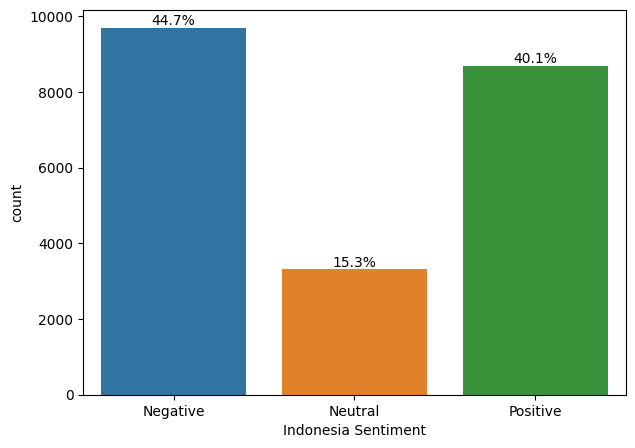

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 5));
g = sns.countplot(x='Indonesia Sentiment', data=df)

ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=10, color='black', rotation=0, xytext=(0, 5),
         textcoords='offset points')

In [79]:
import pandas as pd
import numpy as np

df = pd.read_csv("sentiment results")

df

,Text Filtering,Polarity Score,Indonesia Sentiment
0,"['sirkuit', 'mandalika', 'favorit', 'balap', '...",-4,Negative
1,"['sirkuit', 'mandalika', 'puji', 'balap', 'kel...",0,Neutral
2,"['sirkuit', 'mandalika', 'favorit', 'balap', '...",-4,Negative
3,"['ajang', 'balap', 'motor', 'kelas', 'dunia', ...",3,Positive
4,"['sirkuit', 'mandalika', 'puji', 'balap', 'kel...",0,Neutral
...,...,...,...
21682,"['sirkuit', 'mandalika', 'tuan', 'rumah', 'aja...",3,Positive
21683,"['sirkuit', 'mandalika', 'gelar', 'world', 'ch...",4,Positive
21684,"['motor', 'pakai', 'jajal', 'sirkuit', 'mandal...",-1,Negative
21685,"['patung', 'dek', 'pasang', 'gerbang', 'sirkui...",-1,Negative


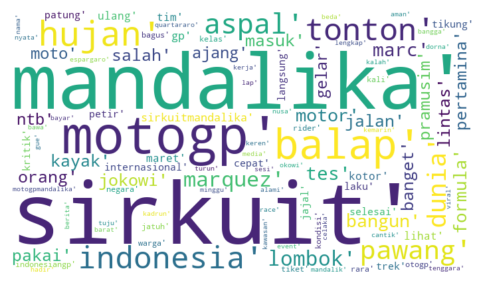

In [80]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Negative']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

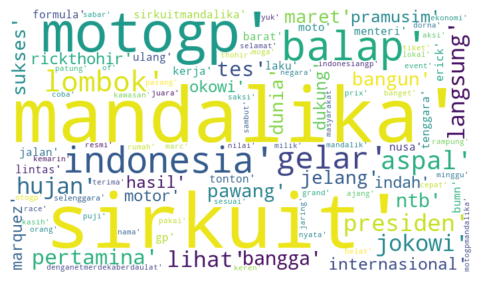

In [81]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Positive']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

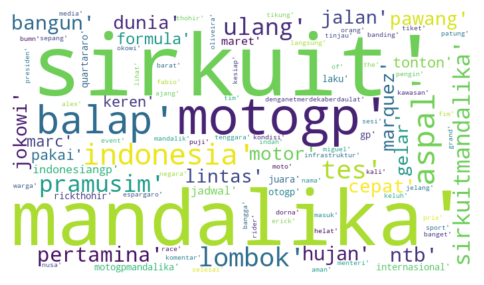

In [82]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

new_df=df[df['Indonesia Sentiment']=='Neutral']
words = ' '.join(new_df['Text Filtering'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700, height=400, max_words = 100, collocations=False
                     ).generate(words)
plt.figure(figsize=(6, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Modeling Data

## Inset Count Vectorizer

In [83]:
import pandas as pd
import numpy as np

df_inset = pd.read_csv("sentiment results")

df_inset

,Text Filtering,Polarity Score,Indonesia Sentiment
0,"['sirkuit', 'mandalika', 'favorit', 'balap', '...",-4,Negative
1,"['sirkuit', 'mandalika', 'puji', 'balap', 'kel...",0,Neutral
2,"['sirkuit', 'mandalika', 'favorit', 'balap', '...",-4,Negative
3,"['ajang', 'balap', 'motor', 'kelas', 'dunia', ...",3,Positive
4,"['sirkuit', 'mandalika', 'puji', 'balap', 'kel...",0,Neutral
...,...,...,...
21682,"['sirkuit', 'mandalika', 'tuan', 'rumah', 'aja...",3,Positive
21683,"['sirkuit', 'mandalika', 'gelar', 'world', 'ch...",4,Positive
21684,"['motor', 'pakai', 'jajal', 'sirkuit', 'mandal...",-1,Negative
21685,"['patung', 'dek', 'pasang', 'gerbang', 'sirkui...",-1,Negative


## Splitting the Data

In [84]:
# Define Y (This is the value we will predict)
X = df_inset["Text Filtering"]
y = df_inset["Indonesia Sentiment"]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Data:", len(X_train))
print("Test Data:", len(X_test))

Train Data: 17349
Test Data: 4338


## Implementation Count Vectorizer

In [86]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('indonesian'))
response = count_vectorizer.fit_transform(X_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [87]:
df_countvectorizer = pd.DataFrame(response.toarray(), columns=count_vectorizer.get_feature_names())
df_countvectorizer.head()

,abal,abdul,abilhudioro,abioq,absen,abu,acara,achruachmadi,adadikompas,adaptasi,...,ye,you,youtube,yuk,yusuf,zainuddin,zaman,zarco,zqscore,zulkieflimansyah
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tranforming the Dataset

In [88]:
X_train = count_vectorizer.transform(X_train)
X_test  = count_vectorizer.transform(X_test)
print(f'Inset Count Data Transformed.')

Inset Count Data Transformed.


## Evaluate Model Function

In [89]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [90]:
count_predictions = text_classifier.predict(X_test)

## Random Forest Model

Confusion matrix: 
 [[1516  118  258]
 [  89  490  107]
 [ 202   98 1460]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.84      0.80      0.82      1892
     Neutral       0.69      0.71      0.70       686
    Positive       0.80      0.83      0.81      1760

    accuracy                           0.80      4338
   macro avg       0.78      0.78      0.78      4338
weighted avg       0.80      0.80      0.80      4338

Inset Random Forest Classifier on Count Vectors: 0.7989857076994007


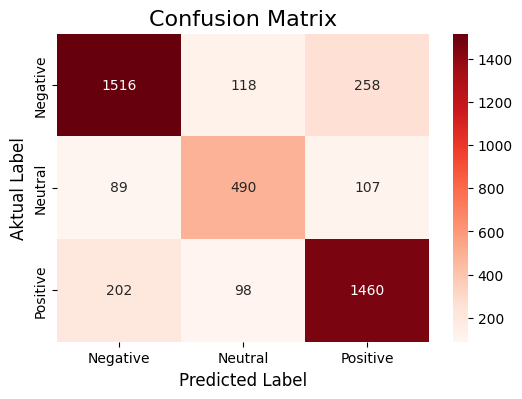

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test,count_predictions)
cr = classification_report(y_test,count_predictions)
rf_cv = accuracy_score(y_test,count_predictions)
print('Confusion matrix: \n',cm)
print('Classification report: \n',cr)
print(f'Inset Random Forest Classifier on Count Vectors: {rf_cv}')

# plot confusion matrix 
plt.figure(figsize=(6,4))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Aktual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

## Inset TF-IDF

In [92]:
import pandas as pd
import numpy as np

df_inset1 = pd.read_csv("sentiment results")

df_inset1

,Text Filtering,Polarity Score,Indonesia Sentiment
0,"['sirkuit', 'mandalika', 'favorit', 'balap', '...",-4,Negative
1,"['sirkuit', 'mandalika', 'puji', 'balap', 'kel...",0,Neutral
2,"['sirkuit', 'mandalika', 'favorit', 'balap', '...",-4,Negative
3,"['ajang', 'balap', 'motor', 'kelas', 'dunia', ...",3,Positive
4,"['sirkuit', 'mandalika', 'puji', 'balap', 'kel...",0,Neutral
...,...,...,...
21682,"['sirkuit', 'mandalika', 'tuan', 'rumah', 'aja...",3,Positive
21683,"['sirkuit', 'mandalika', 'gelar', 'world', 'ch...",4,Positive
21684,"['motor', 'pakai', 'jajal', 'sirkuit', 'mandal...",-1,Negative
21685,"['patung', 'dek', 'pasang', 'gerbang', 'sirkui...",-1,Negative


## Splitting the Data

In [93]:
# Define Y (This is the value we will predict)
X = df_inset1["Text Filtering"]
y = df_inset1["Indonesia Sentiment"]

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Train Data:", len(X_train))
print("Test Data:", len(X_test))

Train Data: 17349
Test Data: 4338


## Implementation TF-IDF

In [95]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('indonesian'))
response = tfidf_vectorizer.fit_transform(X_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [96]:
df_tfidf_vectorizer= pd.DataFrame(response.toarray(), columns=tfidf_vectorizer.get_feature_names())
df_tfidf_vectorizer.head()

,abal,abdul,abilhudioro,abioq,absen,abu,acara,achruachmadi,adadikompas,adaptasi,...,ye,you,youtube,yuk,yusuf,zainuddin,zaman,zarco,zqscore,zulkieflimansyah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29834,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tranforming the Dataset

In [97]:
X_train = tfidf_vectorizer.transform(X_train)
X_test  = tfidf_vectorizer.transform(X_test)
print(f'Inset TF IDF Data Transformed.')

Inset TF IDF Data Transformed.


## Evaluate Model Function 

In [98]:
from sklearn.ensemble import RandomForestClassifier

text_classifier1 = RandomForestClassifier(n_estimators=200, criterion='entropy', random_state=0)
text_classifier1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [99]:
tfidf_predictions = text_classifier1.predict(X_test)

## Random Forest Model

Confusion matrix: 
 [[1572  100  220]
 [ 130  445  111]
 [ 256   84 1420]]
Classification report: 
               precision    recall  f1-score   support

    Negative       0.80      0.83      0.82      1892
     Neutral       0.71      0.65      0.68       686
    Positive       0.81      0.81      0.81      1760

    accuracy                           0.79      4338
   macro avg       0.77      0.76      0.77      4338
weighted avg       0.79      0.79      0.79      4338

Inset Random Forest Classifier on TF-IDF Vectors: 0.7923005993545412


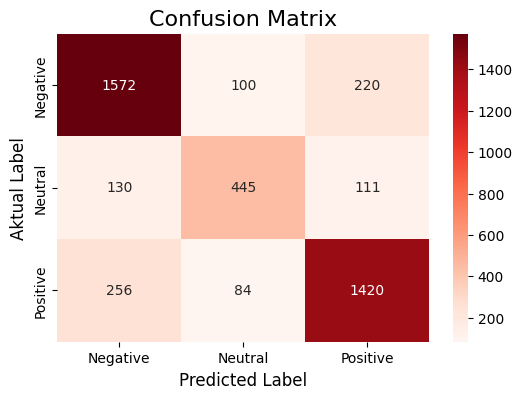

In [100]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

cm1 = confusion_matrix(y_test,tfidf_predictions)
cr1 = classification_report(y_test,tfidf_predictions)
rf_tfidf1 = accuracy_score(y_test,tfidf_predictions)
print('Confusion matrix: \n',cm1)
print('Classification report: \n',cr1)
print(f'Inset Random Forest Classifier on TF-IDF Vectors: {rf_tfidf1}')

# plot confusion matrix 
plt.figure(figsize=(6,4))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm1, cmap=plt.cm.Reds, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Aktual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

## Comparison of Word Weighting Results

In [101]:
import pandas as pd
model = {'Model':['Inset Random Forest Classifier - Count Vectors',
                  'Inset Random Forest Classifier - TFIDF Vectors',
                 ],
         'Accuracy Score':[rf_cv, rf_tfidf1]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Accuracy Score
0,Inset Random Forest Classifier - Count Vectors,0.798986
1,Inset Random Forest Classifier - TFIDF Vectors,0.792301
